<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/2348552_DLLab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1


In [7]:
import tensorflow as tf

In [8]:
def revenue_function(w):
    return 0.5 * w**2 - 30 * w + 100


In [9]:
def revenue_gradient(w):
    return tf.gradients(revenue_function(w), w)[0]

In [10]:
w = tf.Variable(20.0, dtype=tf.float32)
learning_rate = 0.1
momentum = 0.9

In [11]:
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)


In [12]:
for i in range(3):
    with tf.GradientTape() as tape:
        loss = revenue_function(w)
    gradients = tape.gradient(loss, [w])
    optimizer.apply_gradients(zip(gradients, [w]))
    print("Iteration {}: Optimal price (w) = {}".format(i+1, w.numpy()))

Iteration 1: Optimal price (w) = 21.0
Iteration 2: Optimal price (w) = 22.799999237060547
Iteration 3: Optimal price (w) = 25.139999389648438


Part 2

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("/content/Heart_Disease_Prediction.csv")

In [24]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [25]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [27]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

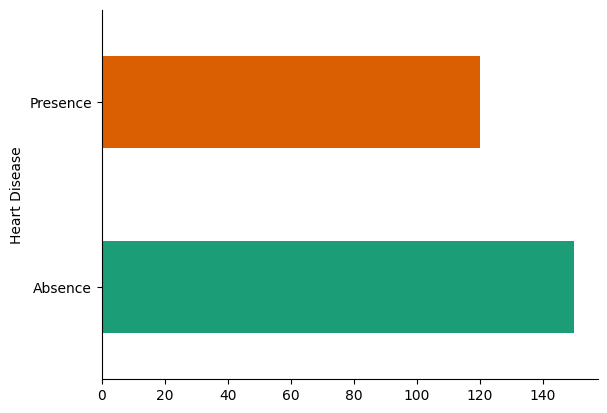

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Heart Disease').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("numerical columns:")
print(numerical_columns)
print("categorical columns:")
print(categorical_columns)

numerical columns:
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')
categorical columns:
Index(['Heart Disease'], dtype='object')


In [30]:
data = pd.get_dummies(df, drop_first=True)
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease_Presence  
0                        3         3                       1  
1                        0         7                       0  

In [31]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease_Presence'],
      dtype='object')

In [32]:
X = data.drop(columns=['Heart Disease_Presence'])
y = data['Heart Disease_Presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
regularization_types = ['L1', 'L2', 'ElasticNet']
regularization_strengths = [0.1, 0.01, 0.001]

for reg_type, reg_strength in zip(regularization_types, regularization_strengths):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(reg_strength)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)

In [37]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
auc = roc_auc_score(y_test, model.predict(X_test))


2/2 [==============================] - 0s 4ms/step


In [38]:
print(f"{reg_type} Regularization Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", cm)
print("AUC:", auc)

ElasticNet Regularization Results:
Accuracy: 0.6296296296296297
Precision: 0.5263157894736842
Recall: 0.47619047619047616
F1 Score: 0.5
Confusion Matrix: [[24  9]
 [11 10]]
AUC: 0.6984126984126985


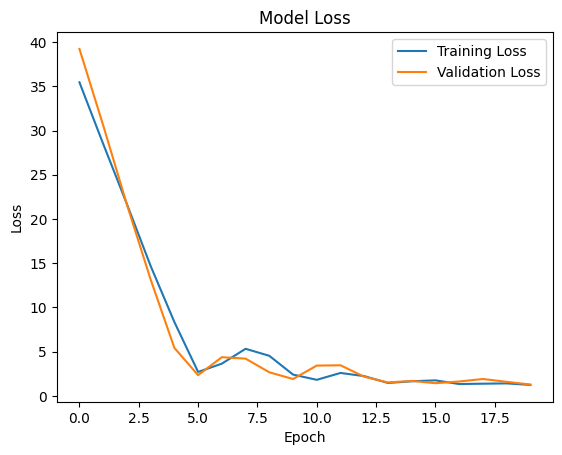

In [39]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

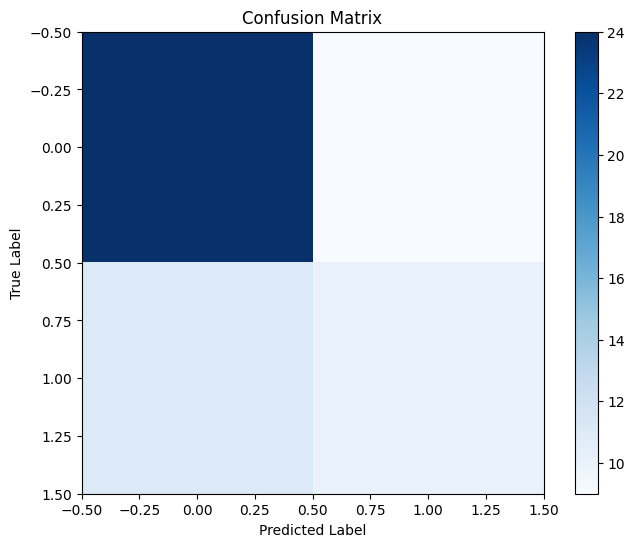

In [40]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

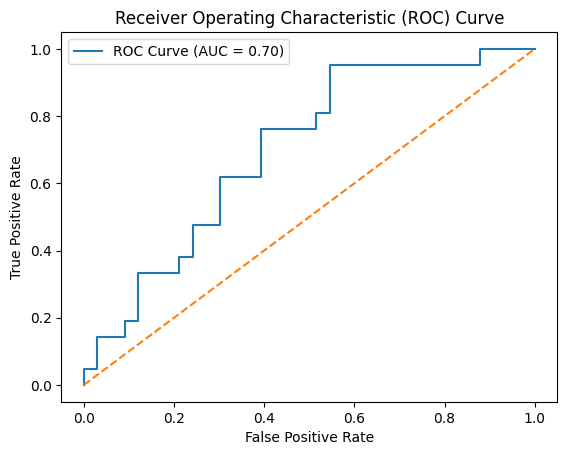

In [41]:
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()